# Gridded monthly air temperature

## Introduction

SWB really should be supplied with accurate minimum and maximum air temperature data even though for application to Hawaii potential evapotranspiration is supplied from external estimates rather than being calculated from air temperatures by means of the Hargreaves-Samani relation. Although not important to the Maui test case, the peaks on the Big Island reach elevations where snow is possible. Supplying appropriate air temperature data to SWB will potentially allow SWB to approximate snowfall episodes.

The air temperature data in the Maui test case come from the Evapotranspiration of Hawaii website and are products of Thomas Giambelluca's lab at the University of Hawaii at Manoa:
 
http://evapotranspiration.geography.hawaii.edu/assets/files/ASCIIFiles/Tmax_month_ascii.rar
http://evapotranspiration.geography.hawaii.edu/assets/files/ASCIIFiles/Tmin_month_ascii.rar


## Preliminaries


In [1]:
import os
import numpy as np
import pandas as pd
import gdal

%run ../../COMMON/plot_and_table_functions.py

# grid files
tmin_grid_filename  = '../input/air_temperature_monthly/tminjan_250m_maui.asc'
tmax_grid_filename  = '../input/air_temperature_monthly/tmaxjan_250m_maui.asc'

## Read grids

In [2]:
# read in runoff zone grid
tmin_data, tmin_gt, tmin_proj, tmin_xy  = read_raster( tmin_grid_filename )
tmax_data, tmax_gt, tmax_proj, tmax_xy  = read_raster( tmax_grid_filename )


reading in ../input/air_temperature_monthly/tminjan_250m_maui.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ../input/air_temperature_monthly/tmaxjan_250m_maui.asc into numpy array...
creating a grid of xy coordinates in the original projection...


## Input datasets and grids

### Example Minimum Air Temperature Grid

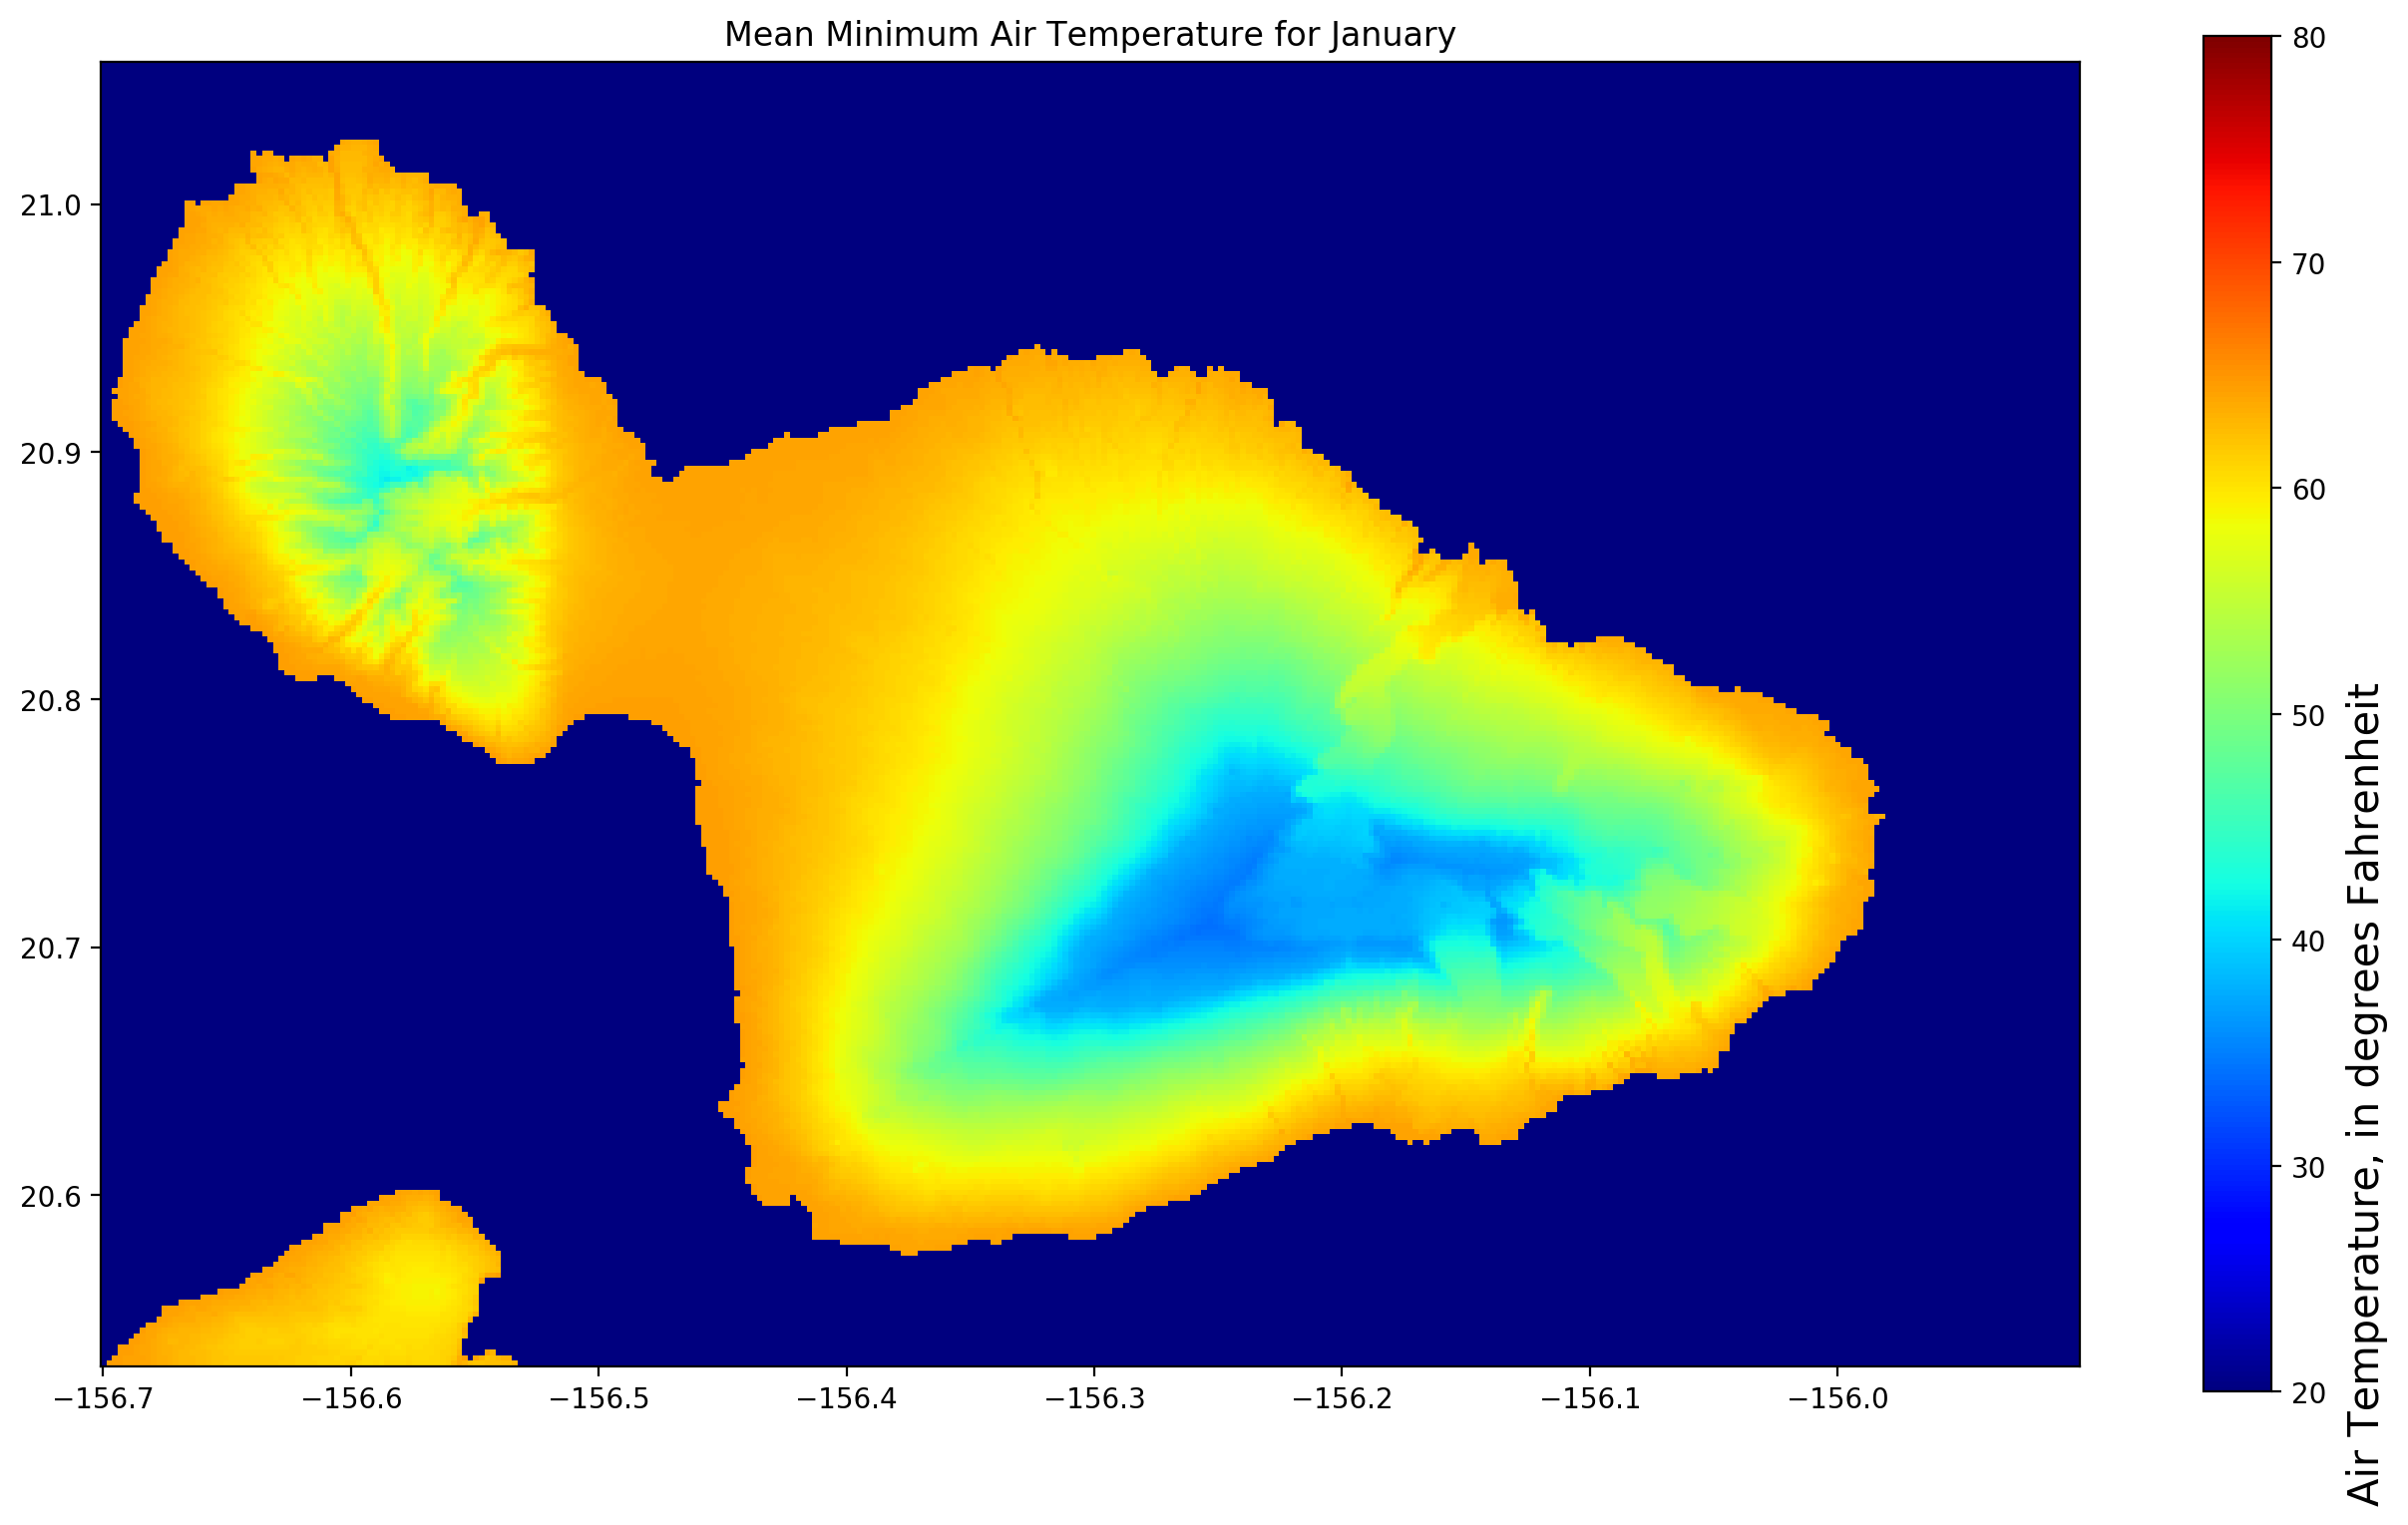

In [3]:
make_plot( x=tmin_xy[0], y=tmin_xy[1], var=tmin_data * 1.8 + 32., discrete=False, title='Mean Minimum Air Temperature for January',
           barlabel='Air Temperature, in degrees Fahrenheit', minz=20., maxz=80. )

## Example Maximum Air Temperture Grid

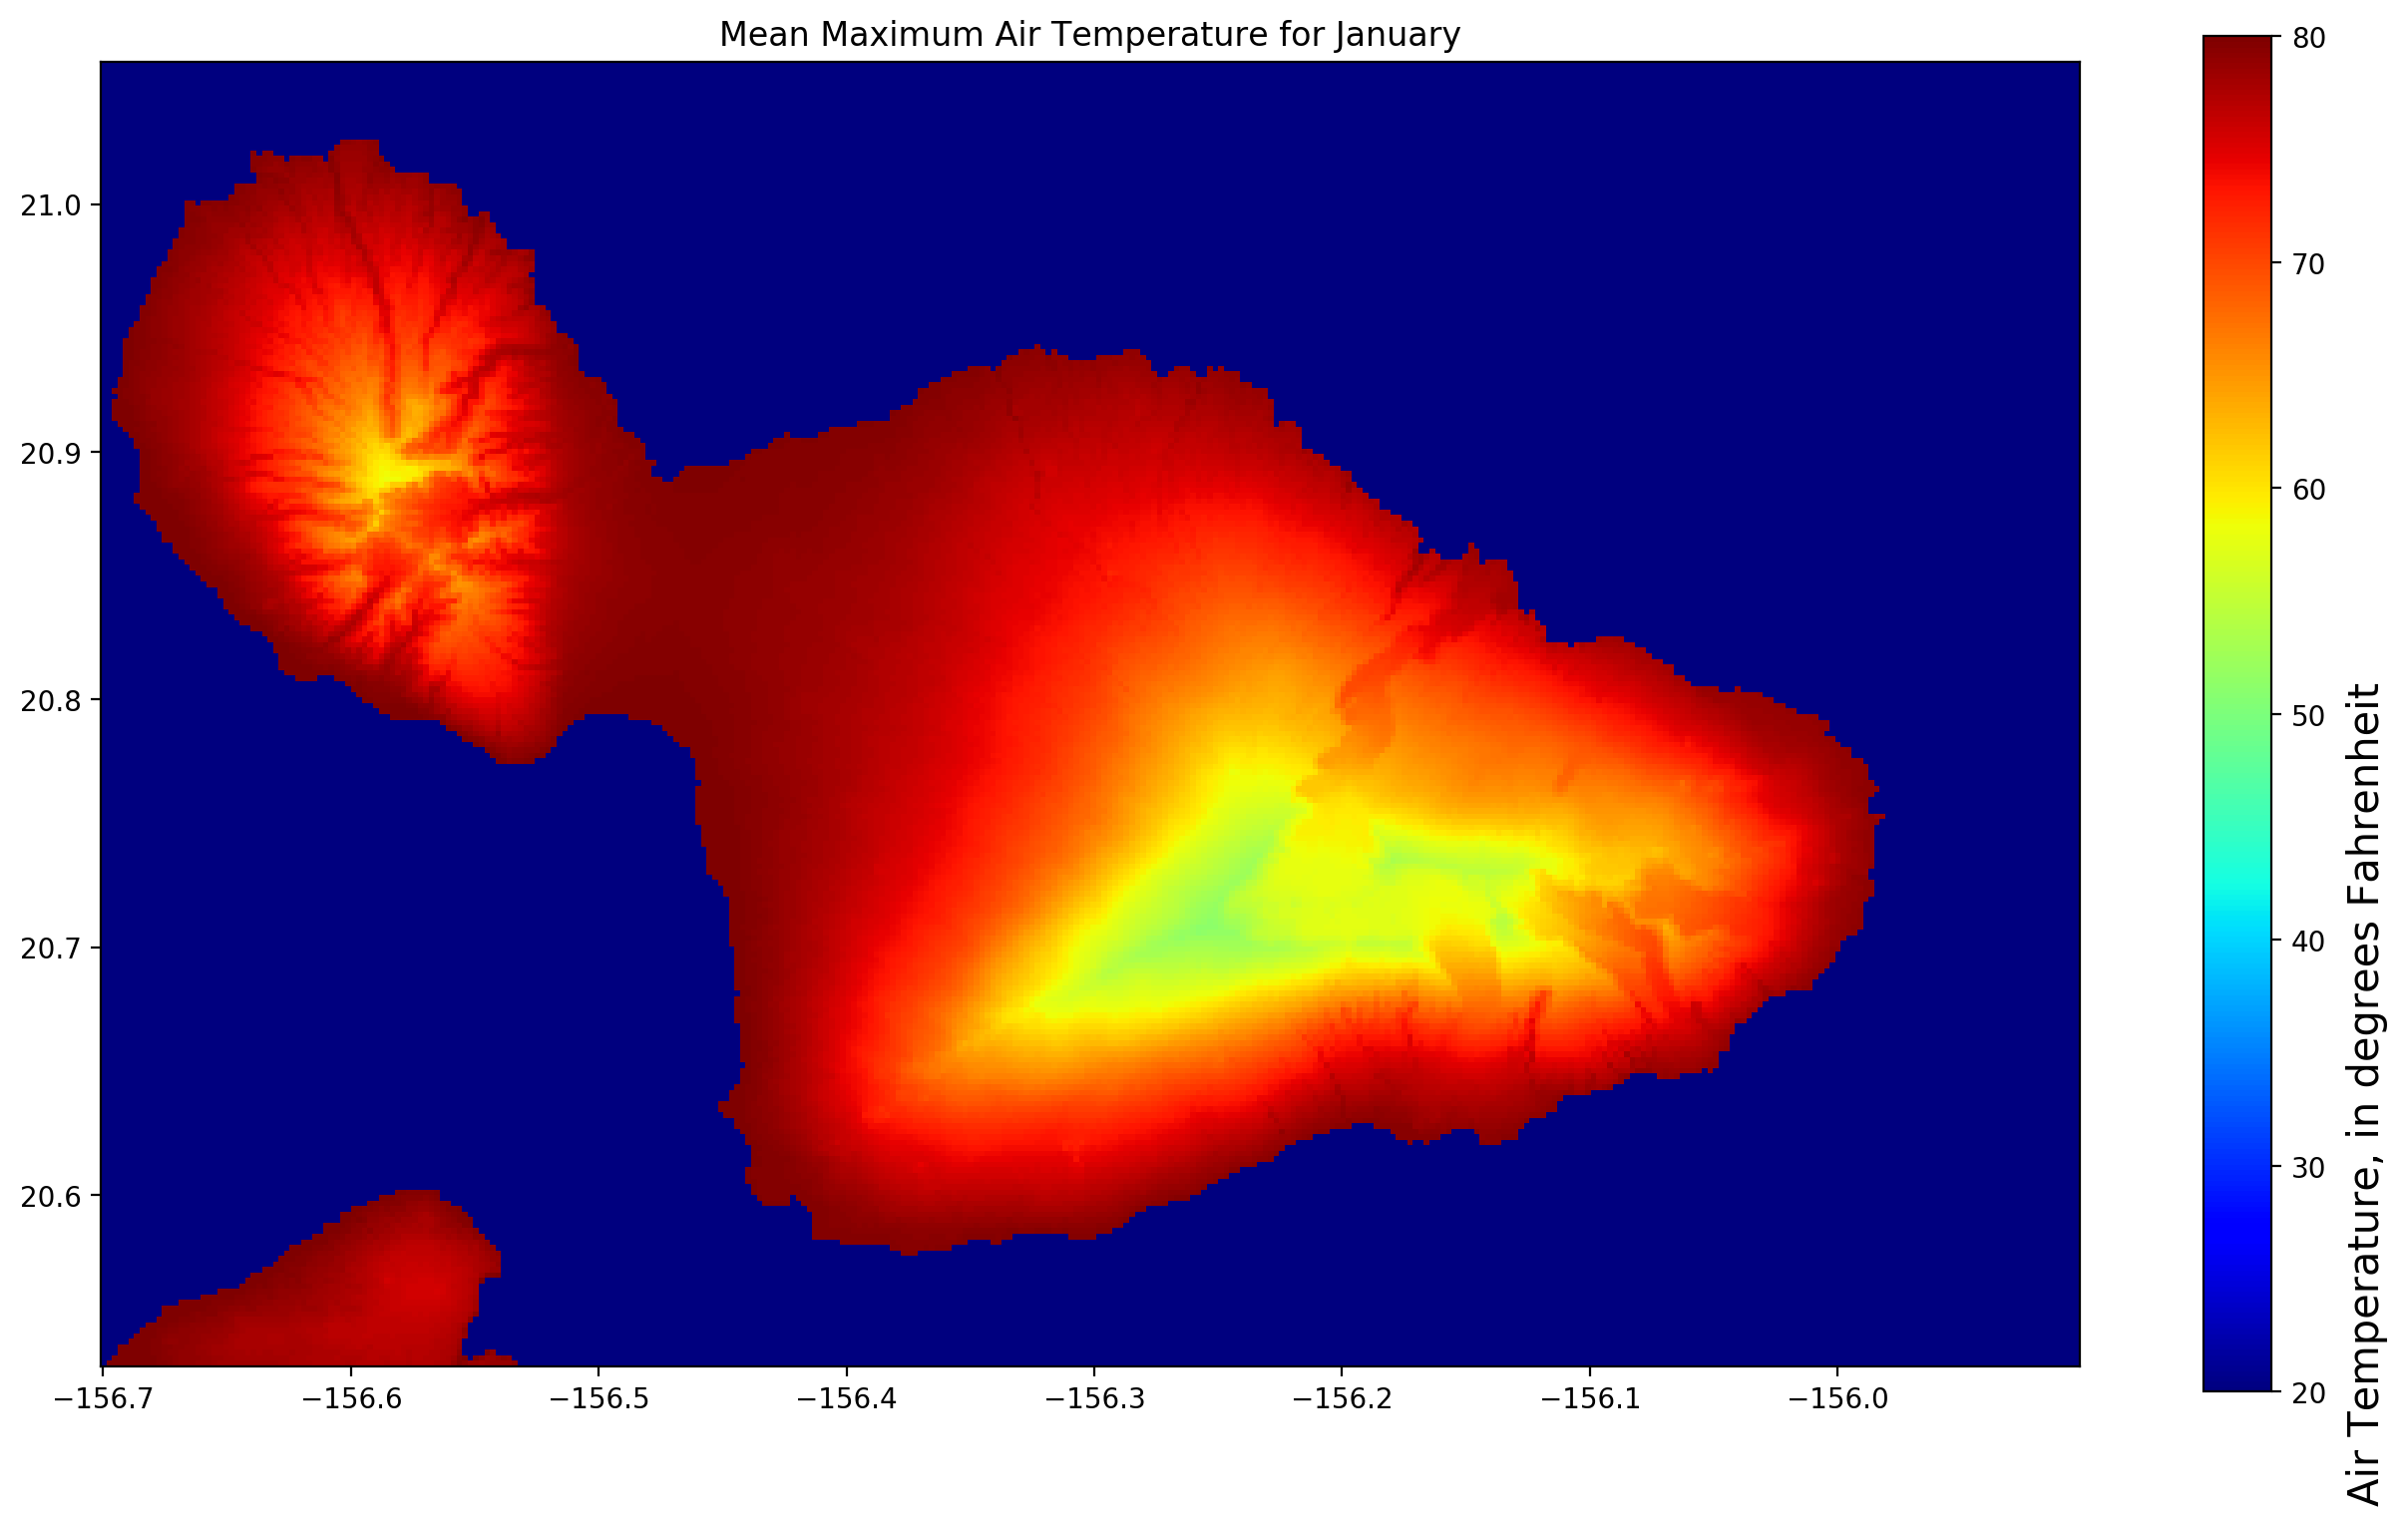

In [4]:
make_plot( x=tmax_xy[0], y=tmax_xy[1], var=tmax_data * 1.8 + 32., discrete=False, title='Mean Maximum Air Temperature for January',
           barlabel='Air Temperature, in degrees Fahrenheit', minz=20., maxz=80. )

## Application

The default behavior in the case of a missing grid file is to simply retain the values from the previous day of simulation. This approach means that monthly mean grids may be supplied in place of daily gridded values; the monthly mean air temperatures will be used throughout the month.

## Control File Entries

The ASCII grids are used directly as downloaded from the weblinks referenced above. In order to use them with SWB, the following control file entries are added, which cause SWB to convert the values to degrees Fahrenheit, and to substitute the mean of all valid entries in place of "NODATA" values. Note that the "%b" in the control file specification causes the three-letter month abbreviation to be substituted into the filename during the appropriate simulation month. In other words, if the simulation date is 4/1/2000, the file that SWB would look for would be "input/Air_Temperature_Monthly/Tmaxapr_250m.asc". 

The monthly mean gridded data source and projection must be specified in the control file, just as normal daily files are specified. The only difference is that the file templates in this case refer to only three-letter month abbreviations:

```
TMAX ARC_GRID input/Air_Temperature_Monthly/Tmax%b_250m.asc
TMAX_GRID_PROJECTION_DEFINITION +proj=lonlat +datum=WGS84 +no_defs
TMAX_SCALE_FACTOR                 1.8
TMAX_ADD_OFFSET                  32.0
TMAX_MISSING_VALUES_CODE        999.0
TMAX_MISSING_VALUES_OPERATOR      <=
TMAX_MISSING_VALUES_ACTION       mean

TMIN ARC_GRID input/Air_Temperature_Monthly/Tmin%b_250m.asc
TMIN_GRID_PROJECTION_DEFINITION +proj=lonlat +datum=WGS84 +no_defs
TMIN_SCALE_FACTOR                 1.8
TMIN_ADD_OFFSET                  32.0
TMIN_MISSING_VALUES_CODE        999.0
TMIN_MISSING_VALUES_OPERATOR      <=
TMIN_MISSING_VALUES_ACTION       mean
```